In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from wordcloud import WordCloud, STOPWORDS
from collections import OrderedDict

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
Training_data = pd.read_csv("../input/train.csv")
Testing_data=pd.read_csv("../input/test.csv")

In [3]:
'''EDA'''
#check top 5 rows
Training_data.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [4]:
Testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
id                       4398 non-null int64
belongs_to_collection    877 non-null object
budget                   4398 non-null int64
genres                   4382 non-null object
homepage                 1420 non-null object
imdb_id                  4398 non-null object
original_language        4398 non-null object
original_title           4398 non-null object
overview                 4384 non-null object
popularity               4398 non-null float64
poster_path              4397 non-null object
production_companies     4140 non-null object
production_countries     4296 non-null object
release_date             4397 non-null object
runtime                  4394 non-null float64
spoken_languages         4356 non-null object
status                   4396 non-null object
tagline                  3535 non-null object
title                    4395 non-null object
Keywords            

In [5]:
#first removing features which are irrelevant for our prediction
Training_data.drop(['imdb_id','poster_path'],axis=1,inplace=True)
Testing_data.drop(['imdb_id','poster_path'],axis=1,inplace=True)

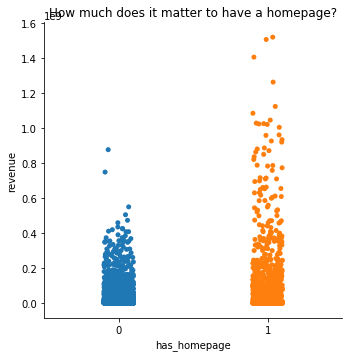

In [8]:
#we have a lot of null values for homepage
#Converting homepage as binary
Training_data['has_homepage'] = 0
Training_data.loc[Training_data['homepage'].isnull() == False, 'has_homepage'] = 1
Testing_data['has_homepage'] = 0
Testing_data.loc[Testing_data['homepage'].isnull() == False, 'has_homepage'] = 1

#Homepage v/s Revenue
sns.catplot(x='has_homepage', y='revenue', data=Training_data);
plt.title('How much does it matter to have a homepage?');


In [9]:
Training_data=Training_data.drop(['homepage'],axis =1)
Testing_data=Testing_data.drop(['homepage'],axis =1)

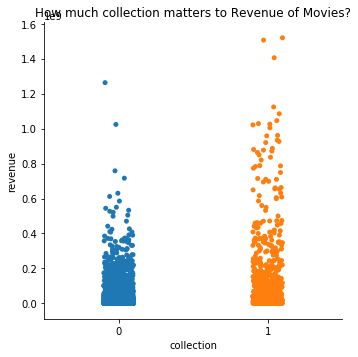

In [12]:

#Converting collections as binary
Training_data['collection'] = 0
Training_data.loc[Training_data['belongs_to_collection'].isnull() == False, 'collection'] = 1
Testing_data['collection'] = 0
Testing_data.loc[Testing_data['belongs_to_collection'].isnull() == False, 'collection'] = 1

#collections v/s Revenue
sns.catplot(x='collection', y='revenue', data=Training_data);
plt.title('How much collection matters to Revenue of Movies?');


In [13]:
#Collection too increaes the revenue
Training_data=Training_data.drop(['belongs_to_collection'],axis =1)
Testing_data=Testing_data.drop(['belongs_to_collection'],axis =1)

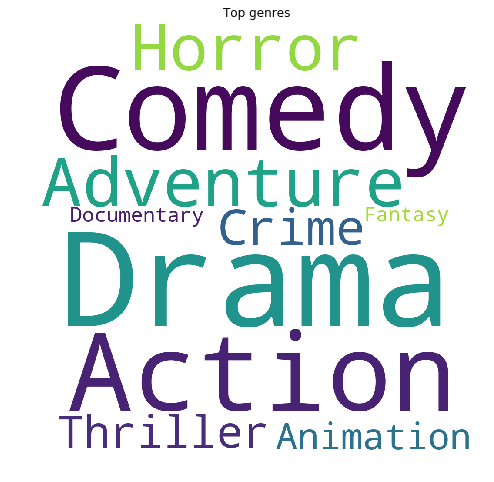

OrderedDict([('TV Movie', 1),
             ('Foreign', 2),
             ('Western', 13),
             ('History', 16),
             ('War', 20),
             ('Music', 20),
             ('Mystery', 33),
             ('Family', 36),
             ('Science Fiction', 41),
             ('Romance', 67),
             ('Fantasy', 68),
             ('Documentary', 71),
             ('Animation', 76),
             ('Thriller', 116),
             ('Crime', 147),
             ('Horror', 170),
             ('Adventure', 187),
             ('Action', 520),
             ('Comedy', 604),
             ('Drama', 785)])

In [14]:
#Exploring Genres
genres = {}
for i in Training_data['genres']:
    if(not(pd.isnull(i))):
        if (eval(i)[0]['name']) not in genres:
            genres[eval(i)[0]['name']]=1
        else:
                genres[eval(i)[0]['name']]+=1
                
plt.figure(figsize = (12, 8))
#text = ' '.join([i for j in genres for i in j])
wordcloud = WordCloud(background_color="white",width=1000,height=1000, max_words=10,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(genres)

plt.imshow(wordcloud)
plt.title('Top genres')
plt.axis("off")
plt.show()
genres = OrderedDict(genres)
#Drama, Comedy and Thriller are popular genres
OrderedDict(sorted(genres.items(), key=lambda t: t[1]))

In [16]:
#adding number of genres for each movie
genres_count=[]
for i in Training_data['genres']:
    if(not(pd.isnull(i))):
        
        genres_count.append(len(eval(i)))
        
    else:
        genres_count.append(0)
Training_data['num_genres'] = genres_count

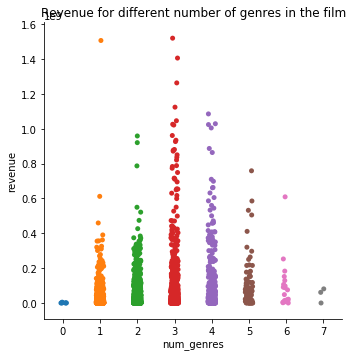

In [17]:
#Genres v/s revenue
sns.catplot(x='num_genres', y='revenue', data=Training_data);
plt.title('Revenue for different number of genres in the film');

In [19]:
#Adding genres count for test data
genres_count_test=[]
for i in Testing_data['genres']:
    if(not(pd.isnull(i))):
        
        genres_count_test.append(len(eval(i)))
        
    else:
        genres_count_test.append(0)
Testing_data['num_genres'] = genres_count_test

In [20]:
#Dropping genres
Training_data.drop(['genres'],axis=1, inplace = True)
Testing_data.drop(['genres'],axis=1, inplace = True)

In [22]:
#Production companies
#Adding production_companies count for  data
prod_comp_count=[]
for i in Training_data['production_companies']:
    if(not(pd.isnull(i))):
        
        prod_comp_count.append(len(eval(i)))
        
    else:
        prod_comp_count.append(0)
Training_data['num_prod_companies'] = prod_comp_count

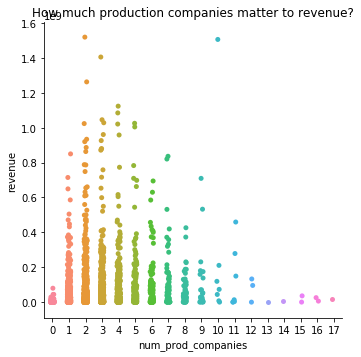

In [24]:
#number of prod companies vs revenue
sns.catplot(x='num_prod_companies', y='revenue', data=Training_data);
plt.title('How much production companies matter to revenue?');

In [25]:
#Adding production_companies count for  test data
prod_comp_count_test=[]
for i in Testing_data['production_companies']:
    if(not(pd.isnull(i))):
        
        prod_comp_count_test.append(len(eval(i)))
        
    else:
        prod_comp_count_test.append(0)
Testing_data['num_prod_companies'] = prod_comp_count_test

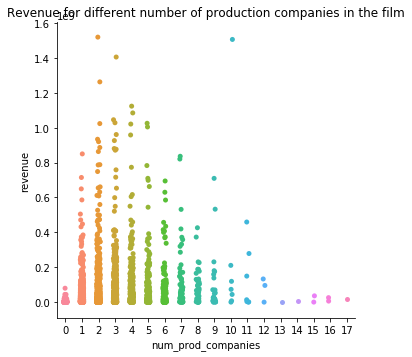

In [26]:
#number of prod companies vs revenue
sns.catplot(x='num_prod_companies', y='revenue', data=Training_data);
plt.title('Revenue for different number of production companies in the film');

In [27]:
#Dropping production_companies
Training_data.drop(['production_companies'],axis=1, inplace = True)
Testing_data.drop(['production_companies'],axis=1, inplace = True)

In [29]:
#production_countries
#Adding production_countries count for  data
prod_coun_count=[]
for i in Training_data['production_countries']:
    if(not(pd.isnull(i))):
        
        prod_coun_count.append(len(eval(i)))
        
    else:
        prod_coun_count.append(0)
Training_data['num_prod_countries'] = prod_coun_count

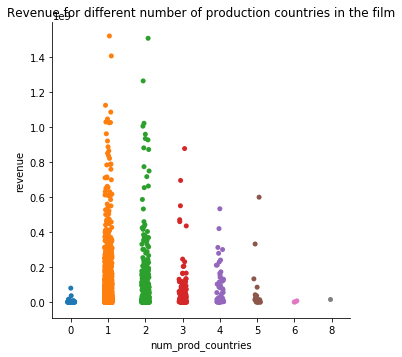

In [30]:
#number of prod countries vs revenue
sns.catplot(x='num_prod_countries', y='revenue', data=Training_data);
plt.title('Revenue for different number of production countries in the film');

In [32]:
#Adding production_countries count for  test data
prod_coun_count_test=[]
for i in Testing_data['production_countries']:
    if(not(pd.isnull(i))):
        
        prod_coun_count_test.append(len(eval(i)))
        
    else:
        prod_coun_count_test.append(0)
Testing_data['num_prod_countries'] = prod_coun_count_test

In [33]:
#Dropping production_countries
Training_data.drop(['production_countries'],axis=1, inplace = True)
Testing_data.drop(['production_countries'],axis=1, inplace = True)

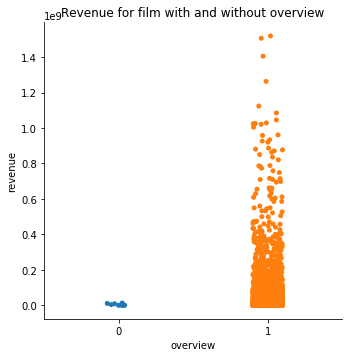

In [34]:
#handling overview
#mapping overview present to 1 and nulls to 0
Training_data['overview']=Training_data['overview'].apply(lambda x: 0 if pd.isnull(x) else 1)
Testing_data['overview']=Testing_data['overview'].apply(lambda x: 0 if pd.isnull(x) else 1)
sns.catplot(x='overview', y='revenue', data=Training_data);
plt.title('Revenue for film with and without overview');

In [35]:
Training_data= Training_data.drop(['overview'],axis=1)
Testing_data= Testing_data.drop(['overview'],axis=1)

In [36]:
#cast
#Adding cast count for  data
total_cast=[]
for i in Training_data['cast']:
    if(not(pd.isnull(i))):
        
        total_cast.append(len(eval(i)))
        
    else:
        total_cast.append(0)
Training_data['cast_count'] = total_cast

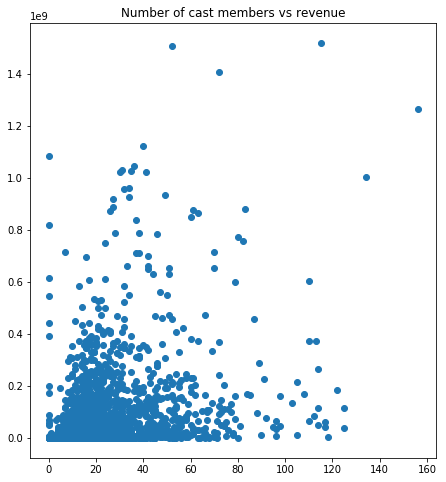

In [37]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(Training_data['cast_count'], Training_data['revenue'])
plt.title('Number of cast members vs revenue');

In [38]:
#cast
#Adding cast count for  test data
total_cast=[]
for i in Testing_data['cast']:
    if(not(pd.isnull(i))):
        
        total_cast.append(len(eval(i)))
        
    else:
        total_cast.append(0)
Testing_data['cast_count'] = total_cast

In [39]:
#Dropping cast
Training_data= Training_data.drop(['cast'],axis=1)
Testing_data= Testing_data.drop(['cast'],axis=1)

In [40]:
#crew
total_crew=[]
for i in Training_data['crew']:
    if(not(pd.isnull(i))):
        
        total_crew.append(len(eval(i)))
        
    else:
        total_crew.append(0)
Training_data['crew_count'] = total_crew

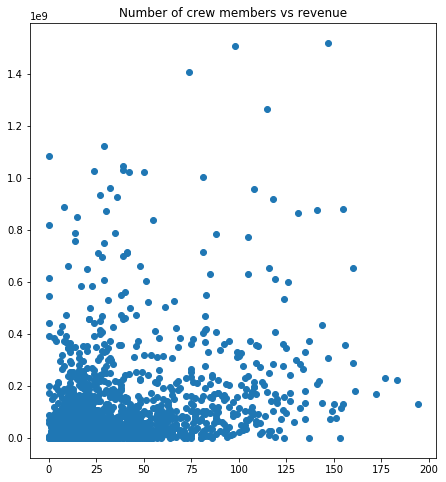

In [41]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(Training_data['crew_count'], Training_data['revenue'])
plt.title('Number of crew members vs revenue');

In [42]:
#Adding crew count for  test data
total_crew=[]
for i in Testing_data['crew']:
    if(not(pd.isnull(i))):
        
        total_crew.append(len(eval(i)))
        
    else:
        total_crew.append(0)
Testing_data['crew_count'] = total_crew

In [43]:
#Dropping crew
Training_data= Training_data.drop(['crew'],axis=1)
Testing_data= Testing_data.drop(['crew'],axis=1)

In [44]:
#Dropping original_title
Training_data= Training_data.drop(['original_title'],axis=1)
Testing_data= Testing_data.drop(['original_title'],axis=1)

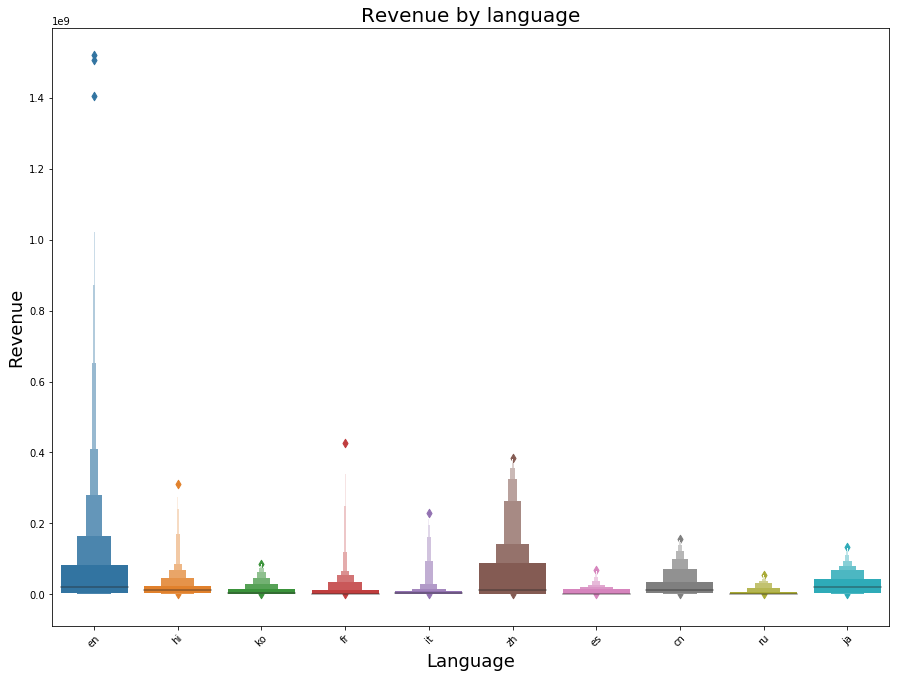

In [47]:
#How language contributes to revenue
plt.figure(figsize=(15,11)) #figure size

#It's another way to plot our data. using a variable that contains the plot parameters
g1 = sns.boxenplot(x='original_language', y='revenue', 
                   data=Training_data[(Training_data['original_language'].isin((Training_data['original_language'].sort_values().value_counts()[:10].index.values)))])
g1.set_title("Revenue by language", fontsize=20) # title and fontsize
g1.set_xticklabels(g1.get_xticklabels(),rotation=45) # It's the way to rotate the xticks when we use variable to our graphs
g1.set_xlabel('Language', fontsize=18) # Xlabel
g1.set_ylabel('Revenue', fontsize=18) #Ylabel

plt.show()

In [48]:
#Taking only en and zh into consideration as they are the highest grossing
Training_data['original_language'] = Training_data['original_language'].apply(lambda x: 1 if x=='en' else(2 if x=='zh' else 0))
Testing_data['original_language'] =  Testing_data['original_language'].apply(lambda x: 1 if x=='en' else(2 if x=='zh' else 0))

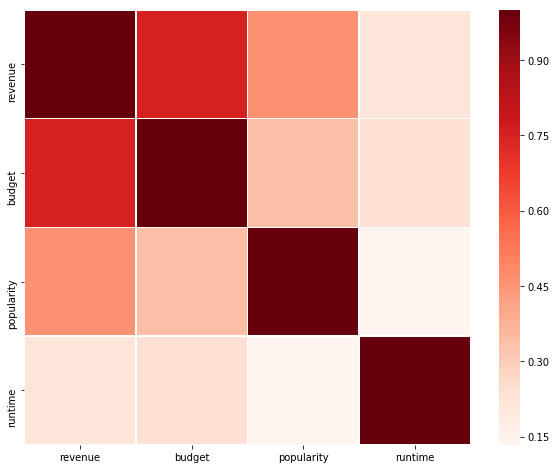

In [49]:
#check correlation between variables
col = ['revenue','budget','popularity','runtime']

plt.subplots(figsize=(10, 8))

corr = Training_data[col].corr()

sns.heatmap(corr, xticklabels=col,yticklabels=col, linewidths=.5, cmap="Reds")

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


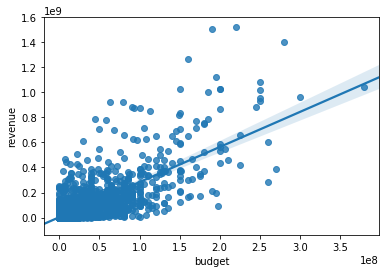

In [50]:
#budget and revenue are highly correlated
sns.regplot(x="budget", y="revenue", data=Training_data)

In [51]:
#Check how revenue depends of day
Training_data['release_date']=pd.to_datetime(Training_data['release_date'])
Testing_data['release_date']=pd.to_datetime(Testing_data['release_date'])


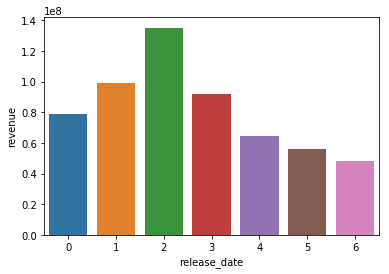

In [52]:
release_day = Training_data['release_date'].value_counts().sort_index()
release_day_revenue= Training_data.groupby(['release_date'])['revenue'].sum()
release_day_revenue.index=release_day_revenue.index.dayofweek
sns.barplot(release_day_revenue.index,release_day_revenue, data = Training_data,ci=None)
plt.show()

In [54]:
#adding day feature to the data

Training_data['release_day']=Training_data['release_date'].dt.dayofweek 
Testing_data['release_day']=Testing_data['release_date'].dt.dayofweek 

In [55]:
#filling nulls in test
Testing_data['release_day']=Testing_data['release_day'].fillna(0)

In [56]:
Training_data.drop(['release_date'],axis=1,inplace=True)
Testing_data.drop(['release_date'],axis=1,inplace=True)

In [57]:
#status
print("train data")
print(Training_data['status'].value_counts())
print("test data")
Testing_data['status'].value_counts()


train data
Released    2996
Rumored        4
Name: status, dtype: int64
test data


Released           4389
Post Production       5
Rumored               2
Name: status, dtype: int64

In [58]:
#Feature is irrelevant hence dropping
Training_data.drop(['status'],axis=1,inplace =True)
Testing_data.drop(['status'],axis=1,inplace =True)

In [59]:
#keywords
Keywords_count=[]
for i in Training_data['Keywords']:
    if(not(pd.isnull(i))):
        
        Keywords_count.append(len(eval(i)))
        
    else:
        Keywords_count.append(0)
Training_data['Keywords_count'] = Keywords_count

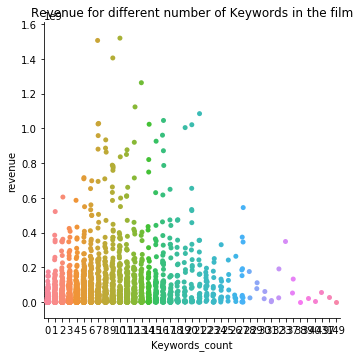

In [60]:
#number of prod countries vs revenue
sns.catplot(x='Keywords_count', y='revenue', data=Training_data);
plt.title('Revenue for different number of Keywords in the film');

In [61]:
Keywords_count=[]
for i in Testing_data['Keywords']:
    if(not(pd.isnull(i))):
        
        Keywords_count.append(len(eval(i)))
        
    else:
        Keywords_count.append(0)
Testing_data['Keywords_count'] = Keywords_count

In [62]:
#Dropping title and keywords
Training_data=Training_data.drop(['Keywords'],axis=1)
Training_data=Training_data.drop(['title'],axis=1)
Testing_data=Testing_data.drop(['Keywords'],axis=1)
Testing_data=Testing_data.drop(['title'],axis=1)

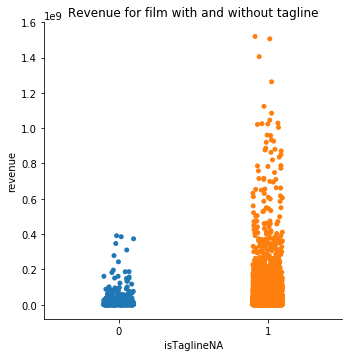

In [63]:
#tagline
Training_data['isTaglineNA'] = 0
Training_data.loc[Training_data['tagline'].isnull() == False, 'isTaglineNA'] = 1
Testing_data['isTaglineNA'] = 0
Testing_data.loc[Testing_data['tagline'].isnull() == False, 'isTaglineNA'] = 1

#Homepage v/s Revenue
sns.catplot(x='isTaglineNA', y='revenue', data=Training_data);
plt.title('Revenue for film with and without tagline');


In [64]:
Training_data.drop(['tagline'],axis=1,inplace =True)
Testing_data.drop(['tagline'],axis=1,inplace =True)

In [65]:
#runtime has 2 nulls; setting it to the mean
#filling nulls in test
Training_data['runtime']=Training_data['runtime'].fillna(Training_data['runtime'].mean())
Testing_data['runtime']=Testing_data['runtime'].fillna(Testing_data['runtime'].mean())

In [67]:
#spoken languages
#adding number of spoken languages for each movie
spoken_count=[]
for i in Training_data['spoken_languages']:
    if(not(pd.isnull(i))):
        
        spoken_count.append(len(eval(i)))
        
    else:
        spoken_count.append(0)
Training_data['spoken_count'] = spoken_count


spoken_count_test=[]
for i in Testing_data['spoken_languages']:
    if(not(pd.isnull(i))):
        
        spoken_count_test.append(len(eval(i)))
        
    else:
        spoken_count_test.append(0)
Testing_data['spoken_count'] = spoken_count_test

In [68]:
#dropping spoken_languages
Training_data.drop(['spoken_languages'],axis=1,inplace=True)
Testing_data.drop(['spoken_languages'],axis=1,inplace=True)

In [70]:
Training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
id                    3000 non-null int64
budget                3000 non-null int64
original_language     3000 non-null int64
popularity            3000 non-null float64
runtime               3000 non-null float64
revenue               3000 non-null int64
has_homepage          3000 non-null int64
collection            3000 non-null int64
num_genres            3000 non-null int64
num_prod_companies    3000 non-null int64
num_prod_countries    3000 non-null int64
cast_count            3000 non-null int64
crew_count            3000 non-null int64
release_day           3000 non-null int64
Keywords_count        3000 non-null int64
isTaglineNA           3000 non-null int64
spoken_count          3000 non-null int64
dtypes: float64(2), int64(15)
memory usage: 398.5 KB


In [69]:
Training_data.head()

,id,budget,original_language,popularity,runtime,revenue,has_homepage,collection,num_genres,num_prod_companies,num_prod_countries,cast_count,crew_count,release_day,Keywords_count,isTaglineNA,spoken_count
0,1,14000000,1,6.575393,93.0,12314651,0,1,1,3,1,24,72,4,4,1,1
1,2,40000000,1,8.248895,113.0,95149435,0,1,4,1,1,20,9,4,4,1,1
2,3,3300000,1,64.299990,105.0,13092000,1,0,1,3,1,51,64,4,12,1,1
3,4,1200000,0,3.174936,122.0,16000000,1,0,2,0,1,7,3,4,7,0,2
4,5,0,0,1.148070,118.0,3923970,0,0,2,0,1,4,2,3,0,0,1


In [71]:
Training_data['budget'] = np.log1p(Training_data['budget'])
Testing_data['budget'] = np.log1p(Testing_data['budget'])

In [72]:
#normalizing budget
#a, b = 1, 100
#m, n = data.budget.min(), data.budget.max()
#data['budget'] = (data.budget - m) / (n - m) * (b - a) + a

Traning the model


In [73]:
y= Training_data['revenue'].values
cols = [col for col in Training_data.columns if col not in ['revenue', 'id']]
X= Training_data[cols].values
y = np.log1p(y)

model 1 - linear Regression

In [74]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
scores = cross_val_score(clf, X, y, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
print(rmse_scores.mean())

2.421359299366101


Model 2 - Random forest regression

In [75]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=10, min_samples_split=5, random_state=0,
                             n_estimators=500)
scores = cross_val_score(regr, X, y, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
print(rmse_scores.mean())

2.2128752012718005


Testing the model

In [76]:
cols = [col for col in Testing_data.columns if col not in ['id']]
X_test= Testing_data[cols].values


In [77]:
regr.fit(X,y)
y_pred = regr.predict(X_test)


In [79]:
y_pred=np.expm1(y_pred)
pd.DataFrame({'id': Testing_data.id, 'revenue': y_pred}).to_csv('submission_RF.csv', index=False)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in expm1
  """Entry point for launching an IPython kernel.


Traing with XGboost and LGB

In [80]:
import xgboost as xgb
import lightgbm as lgb

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [82]:
params = {'num_leaves': 30,
         'min_data_in_leaf': 20,
         'objective': 'regression',
         'max_depth': 5,
         'learning_rate': 0.01,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.2,
         "verbosity": -1}

lgb_model = lgb.LGBMRegressor(**params, n_estimators = 20000, nthread = 4, n_jobs = -1)
lgb_model.fit(X_train, y_train, 
        eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric='rmse',
        verbose=1000, early_stopping_rounds=200)



Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[552]	training's rmse: 1.81658	valid_1's rmse: 1.99908


LGBMRegressor(bagging_fraction=0.9, bagging_freq=1, bagging_seed=11,
       boosting='gbdt', boosting_type='gbdt', class_weight=None,
       colsample_bytree=1.0, feature_fraction=0.9, importance_type='split',
       lambda_l1=0.2, learning_rate=0.01, max_depth=5, metric='rmse',
       min_child_samples=20, min_child_weight=0.001, min_data_in_leaf=20,
       min_split_gain=0.0, n_estimators=20000, n_jobs=-1, nthread=4,
       num_leaves=30, objective='regression', random_state=None,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0, verbosity=-1)

In [83]:
Training_data.head()

,id,budget,original_language,popularity,runtime,revenue,has_homepage,collection,num_genres,num_prod_companies,num_prod_countries,cast_count,crew_count,release_day,Keywords_count,isTaglineNA,spoken_count
0,1,16.454568,1,6.575393,93.0,12314651,0,1,1,3,1,24,72,4,4,1,1
1,2,17.504390,1,8.248895,113.0,95149435,0,1,4,1,1,20,9,4,4,1,1
2,3,15.009433,1,64.299990,105.0,13092000,1,0,1,3,1,51,64,4,12,1,1
3,4,13.997833,0,3.174936,122.0,16000000,1,0,2,0,1,7,3,4,7,0,2
4,5,0.000000,0,1.148070,118.0,3923970,0,0,2,0,1,4,2,3,0,0,1


In [84]:
lgb_model.fit(X, y, 
        eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric='rmse',
        verbose=1000, early_stopping_rounds=200)
y_pred=lgb_model.predict(X_test)


Training until validation scores don't improve for 200 rounds.
[1000]	valid_0's rmse: 1.70436	valid_1's rmse: 1.55599
[2000]	valid_0's rmse: 1.45999	valid_1's rmse: 1.35143
[3000]	valid_0's rmse: 1.2782	valid_1's rmse: 1.18989
[4000]	valid_0's rmse: 1.12776	valid_1's rmse: 1.05571
[5000]	valid_0's rmse: 1.00309	valid_1's rmse: 0.948568
[6000]	valid_0's rmse: 0.8957	valid_1's rmse: 0.856221
[7000]	valid_0's rmse: 0.808043	valid_1's rmse: 0.781537
[8000]	valid_0's rmse: 0.729987	valid_1's rmse: 0.710703
[9000]	valid_0's rmse: 0.65981	valid_1's rmse: 0.649323
[10000]	valid_0's rmse: 0.59761	valid_1's rmse: 0.593421
[11000]	valid_0's rmse: 0.544057	valid_1's rmse: 0.545649
[12000]	valid_0's rmse: 0.494914	valid_1's rmse: 0.50063
[13000]	valid_0's rmse: 0.450655	valid_1's rmse: 0.461034
[14000]	valid_0's rmse: 0.411581	valid_1's rmse: 0.42435
[15000]	valid_0's rmse: 0.375979	valid_1's rmse: 0.391511
[16000]	valid_0's rmse: 0.344149	valid_1's rmse: 0.361113
[17000]	valid_0's rmse: 0.314988	v

In [85]:
y_pred=np.expm1(y_pred)
pd.DataFrame({'id': Testing_data.id, 'revenue': y_pred}).to_csv('submission_LGB.csv', index=False)

XGB 

In [86]:

xgb_params = {'eta': 0.01,
              'objective': 'reg:linear',
              'max_depth': 7,
              'subsample': 0.8,
              'colsample_bytree': 0.8,
              'eval_metric': 'rmse',
              'seed': 11,
              'silent': True}
xgb_model = xgb.XGBRegressor(**xgb_params, n_estimators = 20000, 
                             nthread = 4, n_jobs = -1)


In [87]:

xgb_model.fit(X, y, 
        eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric='rmse',
        verbose=1000, early_stopping_rounds=200)

[0]	validation_0-rmse:14.2429	validation_1-rmse:14.1686
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 200 rounds.
[1000]	validation_0-rmse:0.007638	validation_1-rmse:0.008228
[2000]	validation_0-rmse:0.000714	validation_1-rmse:0.00078
[3000]	validation_0-rmse:0.000675	validation_1-rmse:0.000735
Stopping. Best iteration:
[3574]	validation_0-rmse:0.00066	validation_1-rmse:0.000718



XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, eta=0.01, eval_metric='rmse', gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=20000,
       n_jobs=-1, nthread=4, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=11, silent=True,
       subsample=0.8)

In [89]:
y_pred = xgb_model.predict(X_test)

In [91]:
y_pred=np.expm1(y_pred)
pd.DataFrame({'id': Testing_data.id, 'revenue': y_pred}).to_csv('submission_XGB.csv', index=False)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in expm1
  """Entry point for launching an IPython kernel.


In [92]:
from sklearn.ensemble import GradientBoostingRegressor

model_gboost = GradientBoostingRegressor()

model_gboost.fit(X_train, y_train)
y_pred = model_gboost.predict(X_test)

In [94]:
y_pred=np.expm1(y_pred)
pd.DataFrame({'id': Testing_data.id, 'revenue': y_pred}).to_csv('submission_GradientBoosting.csv', index=False)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in expm1
  """Entry point for launching an IPython kernel.
